In [1]:
# CONCLUSION

# 2021 will likely have less than 18 OFF players and more than 14 DEF players (looking at trends after Peaks in graph)

In [2]:
# Web Scraping
from requests import get
from bs4 import BeautifulSoup

# Data
import pandas as pd
from pprint import pprint

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# YEAR_RANGE is (inclusive, exclusive) = (first year, current_year)
FIRST_YEAR = 2000
CURRENT_YEAR = 2021
YEARS = [str(i) for i in range(FIRST_YEAR, CURRENT_YEAR)]
URL = 'http://www.drafthistory.com/index.php/rounds/round_1'
UNIT_DICT = {'QB':1,'RB':1,'WR':1,'TE':1,'C':1,'G':1,'T':1,'DT':2,'DE':2,'LB':2,'DB':2, 'K':1}

In [4]:
# Get Draft Order for sorting DFs
response = get('https://www.pro-football-reference.com/years/' + str(CURRENT_YEAR) + '/draft.htm')
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all('table')
DRAFT_ORDER = pd.read_html(str(table))[0]
DRAFT_ORDER = DRAFT_ORDER[DRAFT_ORDER['Rnd']==1]
DRAFT_ORDER = DRAFT_ORDER['Tm'].to_list()
DRAFT_ORDER

['Jaguars',
 'Jets',
 '49ers',
 'Falcons',
 'Bengals',
 'Dolphins',
 'Lions',
 'Panthers',
 'Broncos',
 'Cowboys',
 'Giants',
 'Eagles',
 'Chargers',
 'Vikings',
 'Patriots',
 'Cardinals',
 'Raiders',
 'Dolphins',
 'Football Team',
 'Bears',
 'Colts',
 'Titans',
 'Jets',
 'Steelers',
 'Jaguars',
 'Browns',
 'Ravens',
 'Saints',
 'Packers',
 'Bills',
 'Ravens',
 'Buccaneers']

In [10]:
# Get Data - Takes 5 seconds to run

response = get(URL)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all('table')
df = pd.read_html(str(table))[0]
df

,0,1,2,3,4,5,6,7
0,Round 1 Picks,Round 1 Picks,Round 1 Picks,Round 1 Picks,Round 1 Picks,Round 1 Picks,Round 1 Picks,Round 1 Picks
1,Year,Round,Pick,Player,Name,Team,Position,College
2,2020,1,1,1,Joe Burrow,Bengals,QB,Louisiana State
3,NaN,1,2,2,Chase Young,Redskins,DE,Ohio State
4,NaN,1,3,3,Jeff Okudah,Lions,DB,Ohio State
...,...,...,...,...,...,...,...,...
1990,NaN,1,5,5,Jim Lawrence,Cardinals,B,Texas Christian
1991,NaN,1,6,6,Joe Stydahar,Bears,T,West Virginia
1992,NaN,1,7,7,Russ Letlow,Packers,G,San Francisco
1993,NaN,1,8,8,Sid Wagner,Lions,G,Michigan State


In [11]:
# Clean Data

# Drop Top Label Rows And Convert To Column Names
df.drop(0, inplace=True)
df.rename(columns = {k:df.loc[1,k] for k in df.columns}, inplace=True)
df.drop(1, inplace=True)

# Drop Unnecessary Columns
df.drop(columns=['Player', 'College'], inplace=True)

# Fill In Years For Null
for row in df.index:
    if pd.isnull(df.loc[row, 'Year']):
        df.loc[row, 'Year'] = df.loc[row-1, 'Year']
        
# Keep Certain Years
df = df[df['Year'].isin(YEARS)]

# Add Codes for Position
df.insert(len(df.columns), 'PositionE.', df['Position'].astype('category').cat.codes, True)

# Add column for Unit
df.insert(len(df.columns), 'Unit', [UNIT_DICT[i] for i in df['Position']] ,True)

df

,Year,Round,Pick,Name,Team,Position
2,2020,1,1,Joe Burrow,Bengals,QB
3,2020,1,2,Chase Young,Redskins,DE
4,2020,1,3,Jeff Okudah,Lions,DB
5,2020,1,4,Andrew Thomas,Giants,T
6,2020,1,5,Tua Tagovailoa,Dolphins,QB
...,...,...,...,...,...,...
665,2000,1,27,Anthony Becht,Jets,TE
666,2000,1,28,Rob Morris,Colts,LB
667,2000,1,29,R. Jay Soward,Jaguars,WR
668,2000,1,30,Keith Bulluck,Titans,LB


In [59]:
# PROTOTYPE / EXPERIMENTATION

df[df['Team']=='Giants']

,Year,Round,Pick,Name,Team,Position,PositionE.
5,2020,1,4,Andrew Thomas,Giants,T,9
39,2019,1,6,Daniel Jones,Giants,QB,7
50,2019,1,17,Dexter Lawrence,Giants,DT,3
63,2019,1,30,Deandre Baker,Giants,DB,1
67,2018,1,2,Saquon Barkley,Giants,RB,8
120,2017,1,23,Evan Engram,Giants,TE,10
139,2016,1,10,Eli Apple,Giants,DB,1
169,2015,1,9,Ereck Flowers,Giants,G,4
204,2014,1,12,Odell Beckham,Giants,WR,11
243,2013,1,19,Justin Pugh,Giants,T,9


In [101]:
# See how many times Teams Have Drafted Same Position Over Years
# Hypothesis: teams do not draft the same exact position 2 years in a row

# Goal 1: Find out avg. distance (years) between drafting each position
# df[df['Position']=='G']['Team'].value_counts()

def test_same_positions(positions):
    
    new = pd.DataFrame()
    for pos in positions:
        pos_df = df[df['Position']==pos]
        new = pd.concat([new, pos_df])
        
    new2 = pd.DataFrame()
    new3 = pd.DataFrame()
    for team in new['Team'].unique():
        team_df = new[new['Team']==team].copy()
        team_df['Year'] = team_df['Year'].astype(int)
        team_df = team_df.sort_values(by='Year', ascending=False)

        if len(team_df) > 1:
            team_dif = team_df.groupby(['Team'])['Year'].apply(lambda x: x.diff()).reset_index().drop(columns='index')
            team_dif.index=[team_df.reset_index()['Team'][0]]*len(team_dif.index)
            new2 = pd.concat([new2, team_df])
            new3 = pd.concat([new3, team_dif]).dropna()
            new3['Year'] = round(new3['Year'].abs(), 2)
            
        
    return new3
    
test_same_positions(['DB']).describe()[['Year']]

# OL = T or G = 66 count, min 0, mid 50% 2.25-6.75, avg 5

# T = OT = 44 count, min 1, mid 50% 4-8.25 years, avg 6.3 years
# G = OG = 5 count, min 6, mid 50% 7-13 years, avg 10.2 years
# C = min 6

# QB

# WR = 51 count, min 1, mid 50% 4-8, avg 6

# S = 88 count, min 1, mid 50% 2-5, avg 3.7

,Year
count,88.000000
mean,3.738636
std,2.878754
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,13.000000


In [10]:
# Create DF for Yearly Positional Values
df2 = pd.DataFrame()
for year in YEARS:
    year_df = df[df['Year'] == year]
    series = pd.concat([year_df['Position'].value_counts(), year_df['Unit'].value_counts()])
    df2 = df2.append(series, ignore_index=True)
df2.fillna(0, inplace=True)
df2.index = YEARS
df2 = df2.astype(int)
df2

,1,2,DB,DE,DT,K,LB,QB,RB,T,TE,WR,G,C
2000,17,14,3,3,2,1,6,1,5,3,2,5,0,0
2001,15,16,6,4,5,0,1,1,3,3,1,6,1,0
2002,16,16,6,4,4,0,2,3,2,4,3,3,1,0
2003,14,18,6,6,5,0,1,4,2,3,1,3,0,1
2004,19,13,5,3,3,0,2,4,3,2,2,7,1,0
2005,17,15,6,4,3,0,2,3,3,2,1,6,1,1
2006,13,19,7,3,3,0,6,3,4,1,2,1,1,1
2007,15,17,7,5,2,0,3,2,2,3,1,6,1,0
2008,16,15,6,4,3,0,2,2,5,7,1,0,1,0
2009,19,13,2,3,3,0,5,3,3,4,1,6,0,2


In [11]:
df2.mean()

1     15.619048
2     16.190476
DB     5.714286
DE     3.952381
DT     3.285714
K      0.047619
LB     3.238095
QB     2.857143
RB     2.333333
T      3.571429
TE     1.142857
WR     3.952381
G      1.095238
C      0.619048
dtype: float64

<AxesSubplot:>

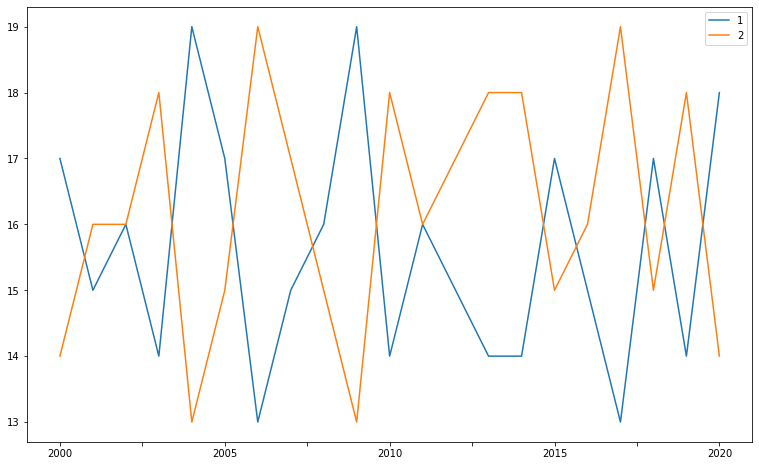

In [12]:
df2[[1, 2]].plot(figsize=(13,8))

In [13]:
# Figure out historical probability of a team to draft a Unit
def team_unit_probability(df):

    new = pd.DataFrame()
    for team in df['Team'].unique():
        team_df = df[df['Team'] == team]
        new = new.append(round(team_df['Unit'].value_counts(normalize=True), 4))
    new.index = df['Team'].unique()
    
    predictions = []
    percents = []
    for ind in new.index:
        if new.loc[ind, 1] > new.loc[ind, 2]:
            high_percent = new.loc[ind, 1]
            unit = 1
        else:
            high_percent = new.loc[ind, 2]
            unit = 2
        if high_percent >= .6:
            if high_percent < .7:
                predictions.append(str(unit))
                percents.append('SL')
            elif high_percent < .8:
                predictions.append(str(unit))
                percents.append('L')
            elif high_percent < .9:
                predictions.append(str(unit))
                percents.append('ML')
            elif high_percent <= 1:
                predictions.append(str(unit))
                percents.append('VL')
        else:
            predictions.append('Unsure')
            percents.append('Unsure')

    new['Unit'] = predictions
    new['Unit%'] = percents
    new = new.reindex(DRAFT_ORDER)
    
    return new

In [14]:
df3 = team_unit_probability(df)
df3.to_csv('Team Unit History.csv', encoding = 'utf-8-sig')
df3

,1,2,Unit,Unit%
Jaguars,0.5000,0.5000,Unsure,Unsure
Jets,0.3462,0.6538,2,SL
49ers,0.4286,0.5714,Unsure,Unsure
Falcons,0.5500,0.4500,Unsure,Unsure
Bengals,0.6364,0.3636,1,SL
Dolphins,0.5500,0.4500,Unsure,Unsure
Lions,0.7500,0.2500,1,L
Panthers,0.4000,0.6000,2,SL
Broncos,0.5238,0.4762,Unsure,Unsure
Cowboys,0.3889,0.6111,2,SL


In [146]:
# Look at distribution between OFF and DEF by Year for each team
# Trend After Last Year - Identify What Teams Tend To Do After The Last 1, 2, Picks (Pattern of OFF OFF DEF, etc.)
# Trend Based on Pick Number - Identify What Teams Tend To Pick Based on Pick Number 
# (2nd Graph = look at horizontal position of this year's pick #)

def plot_unit_by_team(team):
    new = df.sort_index(axis=0, ascending=False)
    new = new[new['Team']==team]
    new.groupby(['Year', 'Unit']).size().unstack().fillna(0).astype(int).sort_index(axis=0).plot.bar(figsize=(10,7))
    
    new['Pick'] = new['Pick'].astype(int)
    sns.set(rc={"figure.figsize": (12, 10)}, font_scale=1.5)
    sns.lmplot(x='Year', y='Pick', data=new, hue='Unit', fit_reg=False, height = 7, aspect = 2.2, scatter_kws={"s": 100})
    
    return new

,Year,Round,Pick,Name,Team,Position,Unit
648,2000,1,10,Travis Taylor,Ravens,WR,1
643,2000,1,5,Jamal Lewis,Ravens,RB,1
638,2001,1,31,Todd Heap,Ravens,TE,1
599,2002,1,24,Ed Reed,Ravens,DB,2
562,2003,1,19,Kyle Boller,Ravens,QB,1
553,2003,1,10,Terrell Suggs,Ravens,DE,2
501,2005,1,22,Mark Clayton,Ravens,WR,1
459,2006,1,12,Haloti Ngata,Ravens,DT,2
444,2007,1,29,Ben Grubbs,Ravens,G,1
402,2008,1,18,Joe Flacco,Ravens,QB,1


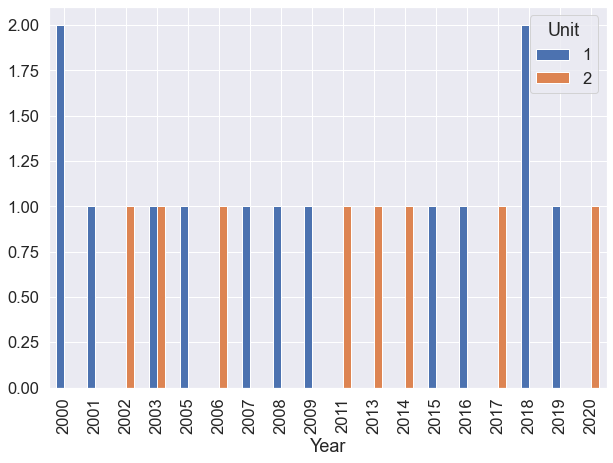

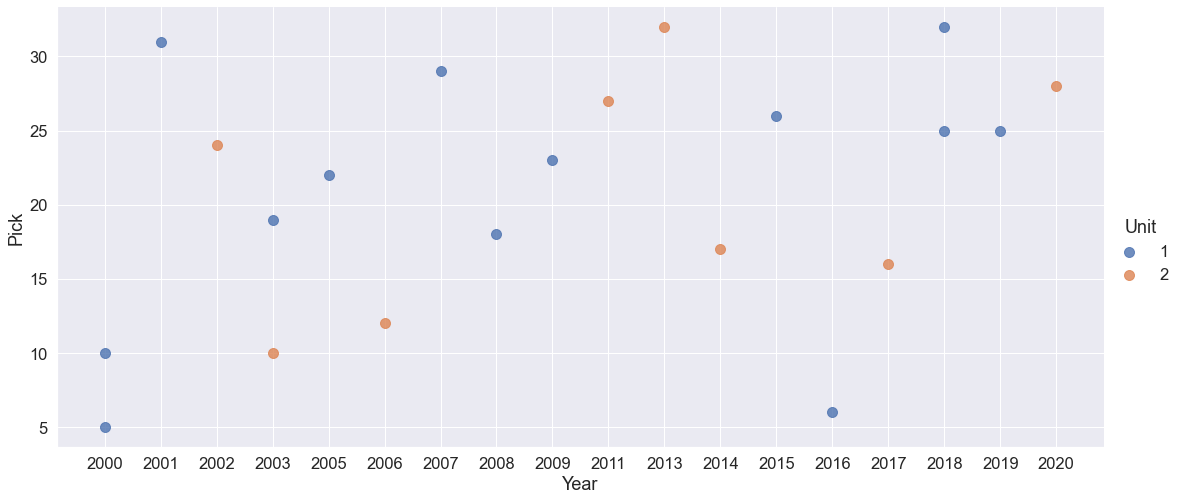

In [185]:
plot_unit_by_team('Ravens')

In [ ]:
# Teams with Multiple 2021 1st Round Picks = Jaguars, Jets, Dolphins, Ravens

# When Jags had 2 picks in 2020, they spent both on DEF, but this will not be the case for 2021 bc T Law. They may pick DEF 2nd.
# The Jets have varied with multiple picks. When they picked OFF first in 2006, they picked OFF again later
# When the Dolphins picked OFF first in 2020, they picked OFF in a similar position to their current pick.
# The Ravens have picked OFF at least once in the 3 times they had 2 picks, and twice 2/3 times. 
# We can expect the Ravens to pick at least one OFF with one of their late picks